### Recognize the gesture according to the given input

In [1]:
#Importing the Libraries
import numpy as np # linear algebra

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import string

import os

In [2]:
#Using the tensorflow librabry
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Find the classes of the dataset file

In [3]:
#Normalizing the data before feeding to the model
train_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [4]:
#Loading the train and test data files and 
#find the how many classes are present 
train_generator = train_datagen.flow_from_directory(
    'Dataset files/Alphabets/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    #subset = 'training'
    )

test_generator = test_datagen.flow_from_directory(
    'Dataset files/Alphabets/Test',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale'
    )


Found 19246 images belonging to 17 classes.
Found 7172 images belonging to 24 classes.


In [5]:
#Class labels
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
print(classes, end = " ")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

In [6]:
#Visualizing the dataset
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 8, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

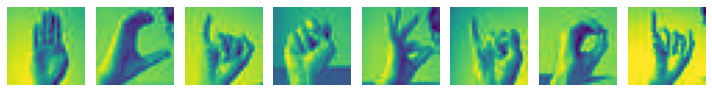

In [7]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:8])

### Keras Model

In [8]:
#import the tensorflow library

import tensorflow as tf

In [9]:
#A small network of single convolution and 3 Dense layers
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation = "relu", input_shape = (28,28,1)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation = "relu"),
        tf.keras.layers.Dense(256, activation = "relu"),
        tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 256)               2769152   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 24)                6168      
                                                        

In [11]:
#Callback to stop training on 99.8% accuracy
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get("loss") < 0.004:
            print("\nReached 99.6% accuracy so cancelling training!")
            self.model.stop_training = True

callback = myCallback()

In [12]:
#Using RMSprop with learning rate = 0.01 and loss as categorical cross entropy
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer = RMSprop(learning_rate = 0.001),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)


### Training

In [13]:
#Traning upto 10 epochs
history = model.fit(
    train_generator,
    epochs=10,
    callbacks = [callback],
    validation_data = test_generator
)

Epoch 1/10
151/151 [==============================] - 67s 428ms/step - loss: 1.7200 - accuracy: 0.4666 - val_loss: 3.8433 - val_accuracy: 0.5544
Epoch 2/10
151/151 [==============================] - 34s 223ms/step - loss: 0.3520 - accuracy: 0.8977 - val_loss: 4.0180 - val_accuracy: 0.6287
Epoch 3/10
151/151 [==============================] - 38s 247ms/step - loss: 0.0740 - accuracy: 0.9833 - val_loss: 4.7225 - val_accuracy: 0.6525
Epoch 4/10
151/151 [==============================] - 32s 212ms/step - loss: 0.0234 - accuracy: 0.9954 - val_loss: 5.0198 - val_accuracy: 0.6085
Epoch 5/10
151/151 [==============================] - 33s 221ms/step - loss: 0.0064 - accuracy: 0.9991 - val_loss: 6.0346 - val_accuracy: 0.6591
Epoch 6/10
151/151 [==============================] - ETA: 0s - loss: 8.3753e-04 - accuracy: 0.9999
Reached 99.6% accuracy so cancelling training!
151/151 [==============================] - 35s 229ms/step - loss: 8.3753e-04 - accuracy: 0.9999 - val_loss: 6.7942 - val_accurac

### Evaluating

In [14]:
#Testing the model on unseen dataset of 7k images
results = model.evaluate(test_generator)

57/57 [==============================] - 8s 137ms/step - loss: 6.7942 - accuracy: 0.6578


### Visualization 

In [16]:
# PLOT LOSS AND ACCURACY
# matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training and validation loss')

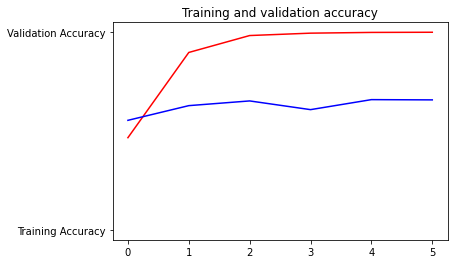

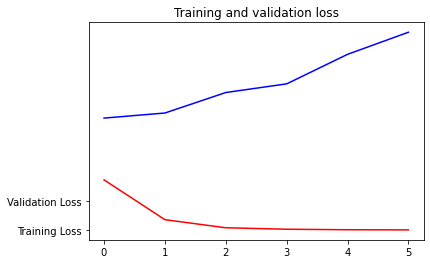

In [17]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')


### Prediction(Given the input and find the gesture Image)

In [19]:
# import the required libraries

!pip install opencv-python

import os
os.sys.path

from random import randint
import cv2 as cv

In [21]:
#Randomly choose an alphabet from folder and display its prediction

def testModel(alphabet = "A"):
    dirname, _, filenames = list(os.walk(f'Dataset files/Alphabets/Test/{alphabet.upper()}'))[0]
    img_path = os.path.join(dirname, filenames[randint(0, len(filenames))])
    print(img_path)
    img = cv.imread(img_path, 0).reshape(1, 28, 28, 1)
    pred = model.predict(img)
    pred_label = classes[np.argmax(pred)]

    plt.imshow(img[0,:,:,0])

Dataset files/Alphabets/Test/N\5343_N.jpg
1/1 [==============================] - 1s 802ms/step


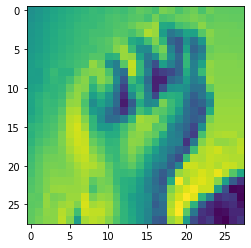

In [22]:
testModel("N")